In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sb

In [57]:
def PCA(X):
    X_std = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
    S = np.cov(X_std.T)
    Λ,V = np.linalg.eigh(S)
    Y = X_std.dot(V) / np.sqrt(np.abs(Λ))
    return Y, Λ, V

In [42]:
def reduceDimensionality(X, Λ, V, k):
    Y = (X * np.sqrt(Λ))[:,-k:].dot(V.T[-k:,:])
    return Y

In [43]:
def myPlotClustering(X, plt_labels, centers=None):
    plt_K = np.unique(plt_labels).size
    c = ['b','g','r','c','m','y','k','w']
#     if(len(c) < plt_K):
#         print('To many labels')
#         return
    for k in range(plt_K):
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'o')
    if centers != None:
        plt.plot(centers[:, 0], centers[:, 1], 'ko')
    plt.show()

In [44]:
yeast = pd.read_csv('/home/dominik/Dokumenty/Studia/Data-mining/Lista3-KMeans/Yeast/yeast.data',delim_whitespace=True,names=['name','mcg','gvh','alm','mit','erl','pox','vac','nuc','Class'])
yeast.head()

,name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


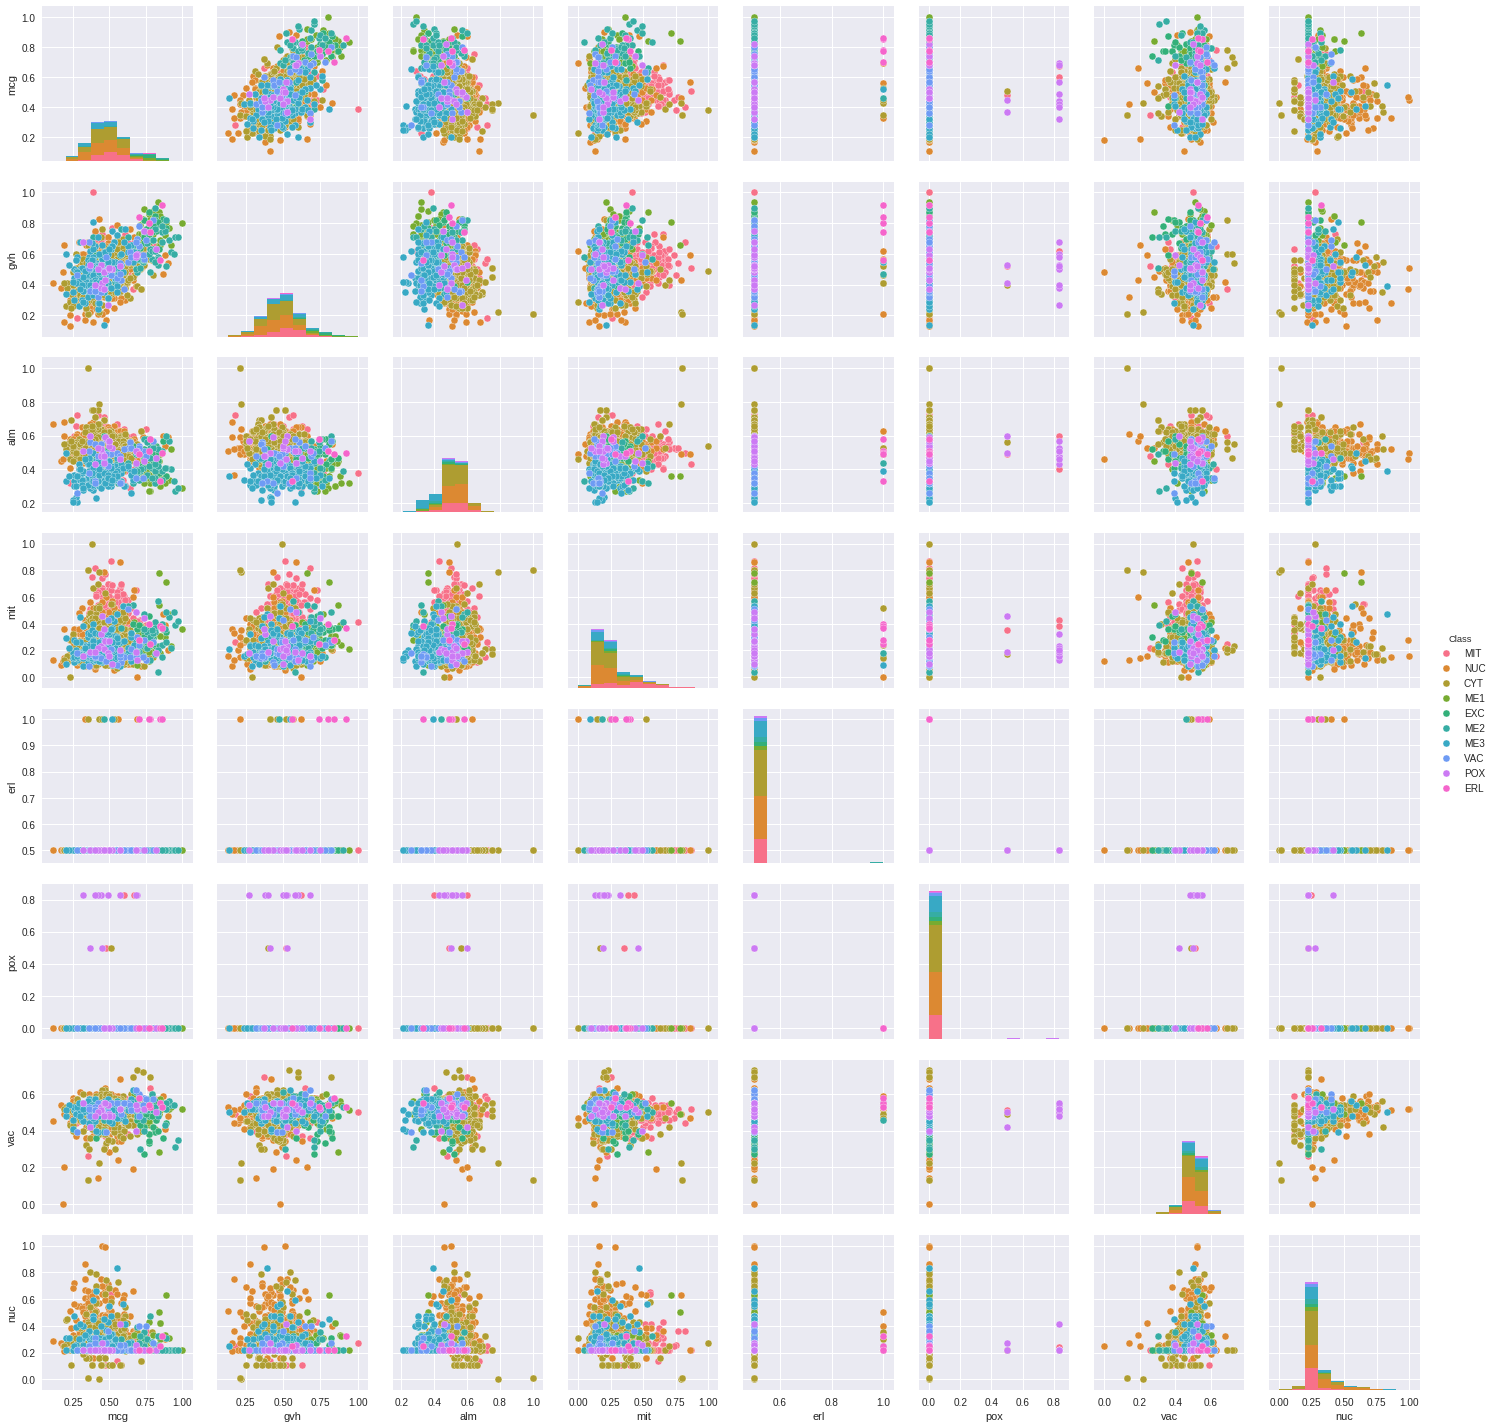

In [45]:
%matplotlib inline
sb.pairplot(yeast, hue='Class')

In [46]:
classes = yeast.Class.unique()
labels = yeast.Class.values
yeast.drop(yeast.columns[[0,5,6,9]],axis=1,inplace=True)
yeast.head()

,mcg,gvh,alm,mit,vac,nuc
0,0.58,0.61,0.47,0.13,0.48,0.22
1,0.43,0.67,0.48,0.27,0.53,0.22
2,0.64,0.62,0.49,0.15,0.53,0.22
3,0.58,0.44,0.57,0.13,0.54,0.22
4,0.42,0.44,0.48,0.54,0.48,0.22


In [47]:
classes.shape

(10,)

In [48]:
Y, Λ, V = PCA(yeast.values)

In [49]:
Z = reduceDimensionality(Y,Λ,V,3)

In [50]:
Z_plot = pd.DataFrame(Z)
# help(pd.concat)
Z_plot = pd.concat([Z_plot,pd.DataFrame(labels)],axis=1, names=[0,1,2,3,4,5,6])
Z_plot.columns = [0,1,2,3,4,5,6]
# Z_plot.columns

In [55]:
Y_plot = pd.DataFrame(Y)
# help(pd.concat)
Y_plot = pd.concat([Y_plot,pd.DataFrame(labels)],axis=1, names=[0,1,2,3,4,5,6])
Y_plot.columns = [0,1,2,3,4,5,6]
# Z_plot.columns

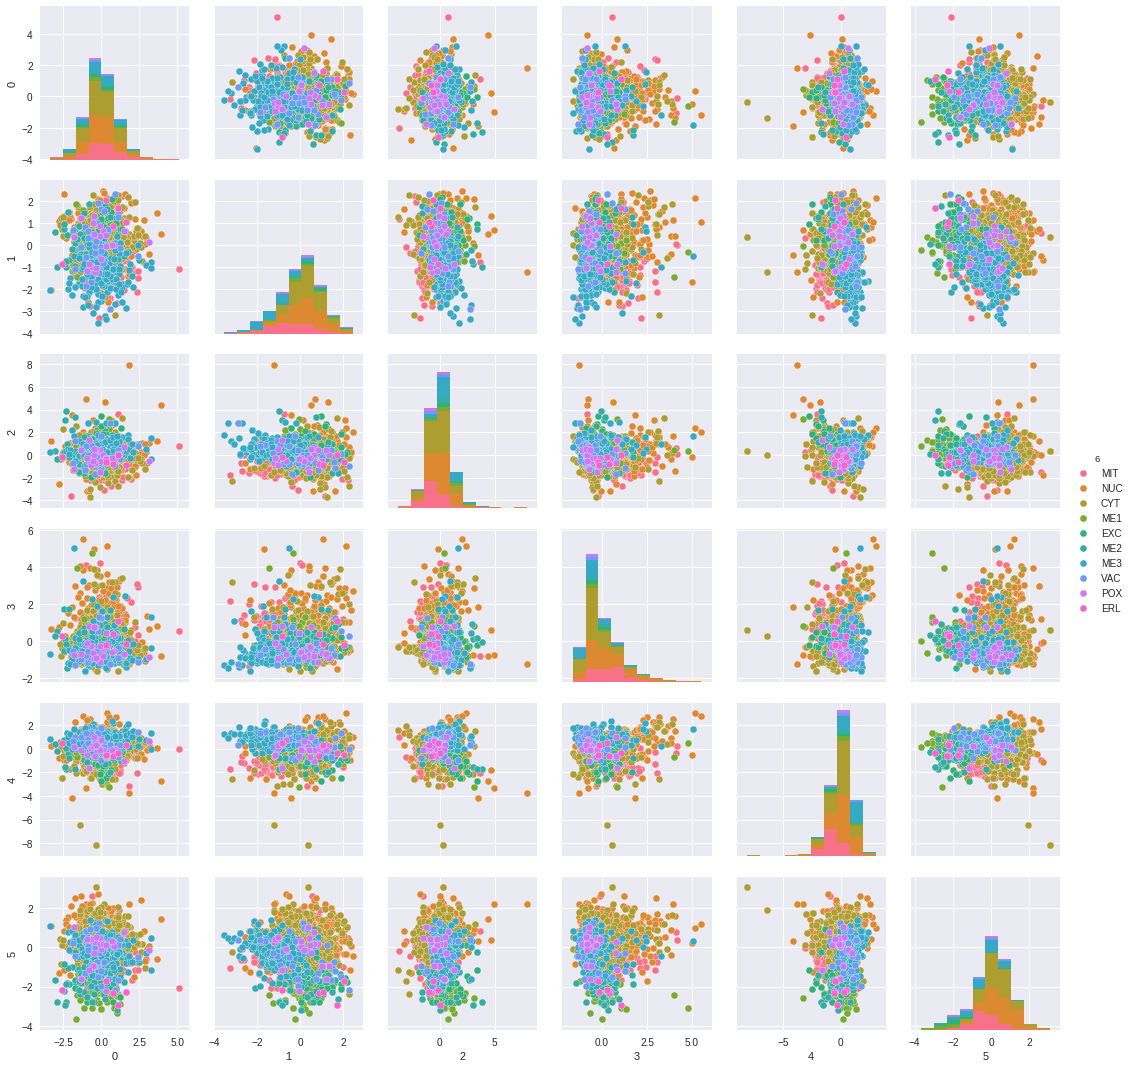

In [56]:
sb.pairplot(Y_plot, hue=6)

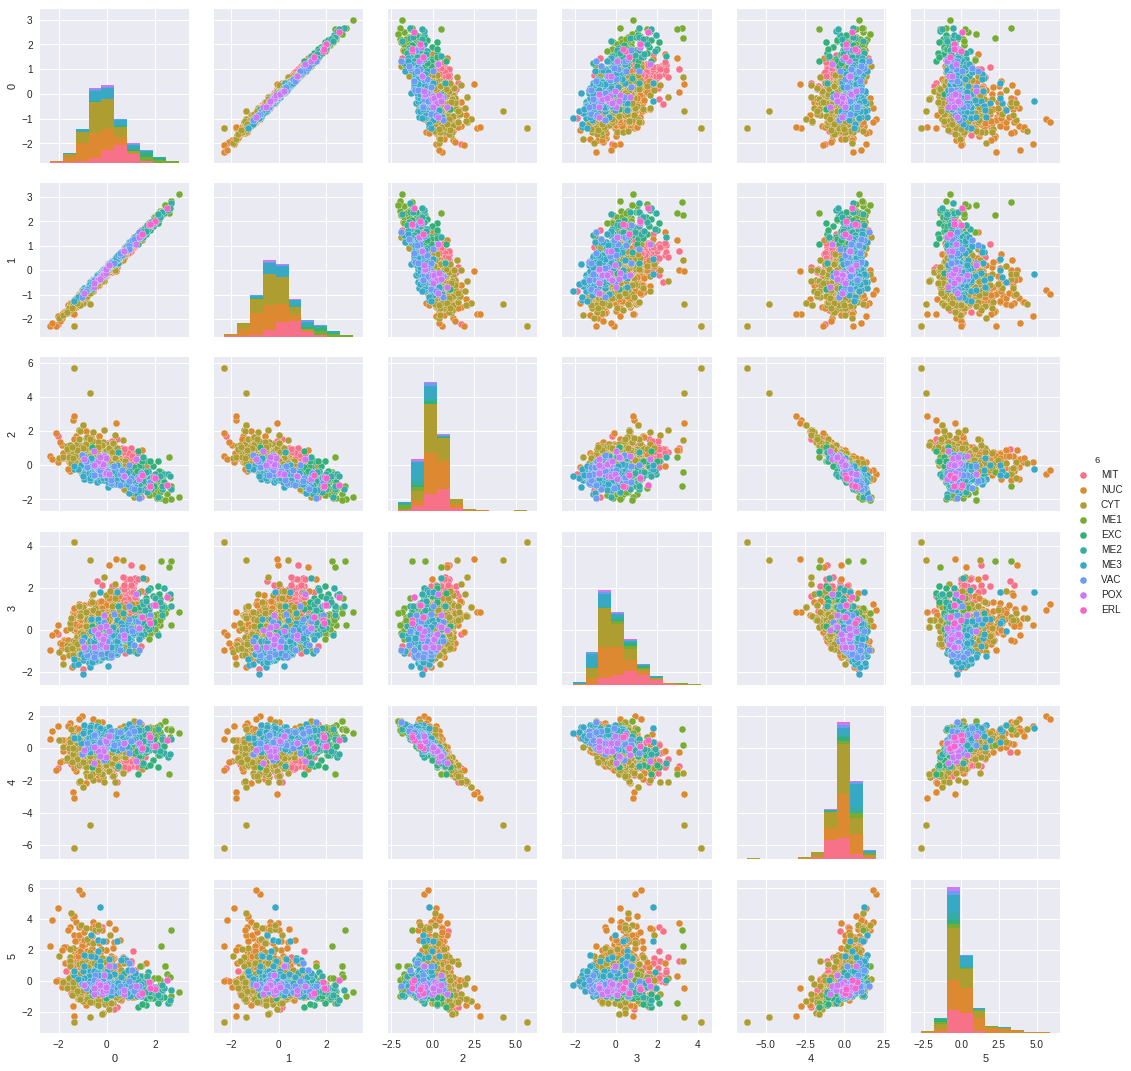

In [52]:
sb.pairplot(Z_plot, hue=6)